In [1]:
import findspark, pyspark
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import *
from datetime import datetime
from functools import reduce
from pyspark.sql.functions import col

sc = pyspark.SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

file_attack = 'gtd_14to17_0718dist'
file_airport = 'airports-extended'
file_largest_airport = 'largest-global-airports-passenger-traffic'
file_passengers = 'avia_par_be'

In [2]:
attack_data = sc.textFile('D:/DataMining/taba/gtd-data/' + file_attack + '.csv')
airport_data = sc.textFile('D:/DataMining/taba/' + file_airport + '.csv')
largest_airport_data = sc.textFile('D:/DataMining/taba/' + file_largest_airport + '.xlsx')
passenger_data = sc.textFile('D:/DataMining/taba/' + file_passengers + '.xls')


In [4]:
new_columns = attack_data.first()
new_columns = new_columns.split(";")

In [5]:
attack_data = attack_data.filter(lambda l: l != new_columns)
df_terror_data = attack_data.map(lambda x: x.split(';')).toDF()
old_columns = df_terror_data.schema.names




In [6]:
df_terror_data = reduce(lambda data, idx: data.withColumnRenamed(old_columns[idx], new_columns[idx]), range(len(old_columns)), df_terror_data)
query_result = df_terror_data.filter(col("country_txt") == "Belgium").select('iyear', 'imonth', 'iday','country_txt', 'summary', 'city', 'nkill')




In [7]:
from pyspark.sql.functions import collect_list
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
query_result = query_result.withColumn("nkill", query_result["nkill"].cast(IntegerType()))
grouped_query = query_result.groupby('iyear').agg(F.sum('nkill').alias("nkill"))

## People killed in Belgium by terrorist attacks 2014-2018

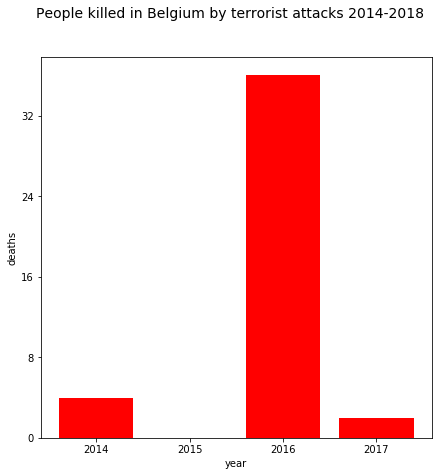

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as plt_dates
from datetime import datetime

y_axis = []
x_axis = []

for row in grouped_query.rdd.collect():
     #Toekennen aan x as
    x_axis.append(int(row.iyear))
    #Toekennen aan y as
    y_axis.append(int(row.nkill))
    
#Maken grafiek
fig1 = plt.figure(figsize=(7, 7))
fig1.suptitle('People killed in Belgium by terrorist attacks 2014-2018', fontsize=14)
ax = fig1.add_subplot(111)
ax.set_xlabel('year')
ax.set_ylabel('deaths')
ax.bar(x_axis, y_axis, fc='red', align='center')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()